In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
url = "http://bit.ly/wkspdata"
df = pd.read_csv(url)
df.tail(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
881,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [3]:
def cleanData(df):
    df = df.drop(["name","cabin","ticket"],axis = 1)
    df = df.dropna()
    cat_feat = ["embarked","sex"]
    df = pd.get_dummies(df,columns=cat_feat )
    return df

In [4]:
df = cleanData(df)
df.tail(10)

,survived,pclass,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
880,1,2,25.0,0,1,26.0000,0,0,1,1,0
881,0,3,33.0,0,0,7.8958,0,0,1,0,1
882,0,3,22.0,0,0,10.5167,0,0,1,1,0
883,0,2,28.0,0,0,10.5000,0,0,1,0,1
884,0,3,25.0,0,0,7.0500,0,0,1,0,1
885,0,3,39.0,0,5,29.1250,0,1,0,1,0
886,0,2,27.0,0,0,13.0000,0,0,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1,1,0
889,1,1,26.0,0,0,30.0000,1,0,0,0,1
890,0,3,32.0,0,0,7.7500,0,1,0,0,1


In [5]:
len(df)

712

In [10]:
X = df.iloc[:,1:].values # inputs
y = df.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


,survived,pclass,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
880,1,2,25.0,0,1,26.0000,0,0,1,1,0
881,0,3,33.0,0,0,7.8958,0,0,1,0,1
882,0,3,22.0,0,0,10.5167,0,0,1,1,0
883,0,2,28.0,0,0,10.5000,0,0,1,0,1
884,0,3,25.0,0,0,7.0500,0,0,1,0,1
885,0,3,39.0,0,5,29.1250,0,1,0,1,0
886,0,2,27.0,0,0,13.0000,0,0,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1,1,0
889,1,1,26.0,0,0,30.0000,1,0,0,0,1
890,0,3,32.0,0,0,7.7500,0,1,0,0,1


In [14]:
len(df)

712

In [16]:
X = df.iloc[:,1:].values # inputs
y = df.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [17]:
log_reg= LogisticRegression(max_iter= 1000)
log_reg.fit(X_train,y_train )

LogisticRegression(max_iter=1000)

In [18]:
y_pred = log_reg.predict(X_test)

In [19]:
test_acc = metrics.accuracy_score(y_test,y_pred)

In [20]:
print("acuuracy",test_acc)

acuuracy 0.8251748251748252


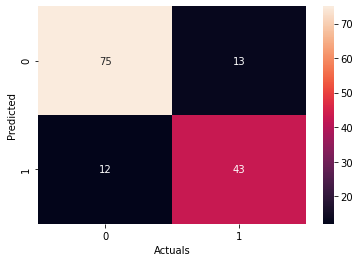

In [21]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(conf_mat.T,annot= True)
plt.xlabel("Actuals")
plt.ylabel("Predicted")
plt.show()

In [22]:
test_pre = metrics.precision_score(y_test,y_pred)
print("Testing precision= ",test_pre)

test_rec = metrics.recall_score(y_test,y_pred)
print("Testing recall = ",test_rec)

Testing precision=  0.7818181818181819
Testing recall =  0.7678571428571429


In [23]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [27]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [29]:
# Step 1: Load in the data
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names) # Inputs (4 input columns)
iris_target = iris.target # Output (0,1,2

In [22]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names) # Inputs (4 input columns)
iris_target = iris.target

In [30]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [31]:
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
# Train - Test - Split
X_train, X_test, y_train, y_test = train_test_split(iris_df, iris_target, test_size=0.2)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
test_acc = metrics.accuracy_score(y_test, y_pred)
print("Testing Accuracy = ", test_acc)

Testing Accuracy =  0.9333333333333333


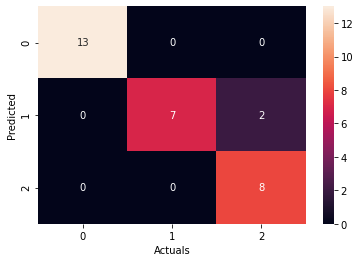

In [33]:
# Confusion Matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)

import seaborn as sns # Visualization library
sns.heatmap(conf_mat.T, annot=True) #annot=True is used to show the numbers in the confusion matrix
plt.xlabel("Actuals")
plt.ylabel("Predicted")
plt.show()

In [34]:
# Precision
test_pre = metrics.precision_score(y_test, y_pred, average=None)
print("Testing Precision = ", test_pre)

Testing Precision =  [1.         0.77777778 1.        ]


In [35]:
#Recall 
test_rec = metrics.recall_score(y_test, y_pred, average=None)
print("Testing Recall = ", test_rec)

Testing Recall =  [1.  1.  0.8]


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [37]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names) # Inputs (4 input columns)
iris_target = iris.target

In [41]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(iris_df, iris_target, test_size=0.2)

In [45]:
from sklearn import svm
svm_classifier = svm.SVC
svm_classifier.fit(X_train,y_train)

TypeError: fit() missing 1 required positional argument: 'y'

In [46]:
y_pred = svm_classifier.predict(X_test)
test_acc = metrics.accuracy_score(y_test, y_pred)
print("Testing Accuracy = ", test_acc)

TypeError: predict() missing 1 required positional argument: 'X'

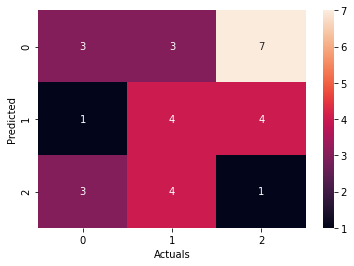

In [47]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)

import seaborn as sns # Visualization library
sns.heatmap(conf_mat.T, annot=True) #annot=True is used to show the numbers in the confusion matrix
plt.xlabel("Actuals")
plt.ylabel("Predicted")
plt.show()

In [48]:
test_pre = metrics.precision_score(y_test, y_pred, average=None)
print("Testing Precision = ", test_pre)

test_rec = metrics.recall_score(y_test, y_pred, average=None)
print("Testing Recall = ", test_rec)

Testing Precision =  [0.23076923 0.44444444 0.125     ]
Testing Recall =  [0.42857143 0.36363636 0.08333333]
